In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  PIL import Image


In [3]:


#import data

data = []

# Specify the path to your dataset
dataset_path = '../data/images/'

# Iterate through each plant folder
for plant_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, plant_class)
    
    # Iterate through each image in the plant folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        data.append({'Image_Path': image_path, 'Class': plant_class})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

df

,Image_Path,Class
0,../data/images/Tomato___spider_mites/fa05ccd2-...,Tomato___spider_mites
1,../data/images/Tomato___spider_mites/fd3b6292-...,Tomato___spider_mites
2,../data/images/Tomato___spider_mites/82306885-...,Tomato___spider_mites
3,../data/images/Tomato___spider_mites/9c7f0991-...,Tomato___spider_mites
4,../data/images/Tomato___spider_mites/d7c5cad4-...,Tomato___spider_mites
...,...,...
95863,../data/images/Soybean___healthy/57c18b39-2a33...,Soybean___healthy
95864,../data/images/Soybean___healthy/4fdc663e-a8ea...,Soybean___healthy
95865,../data/images/Soybean___healthy/df807f13-078b...,Soybean___healthy
95866,../data/images/Soybean___healthy/60bf9858-951a...,Soybean___healthy


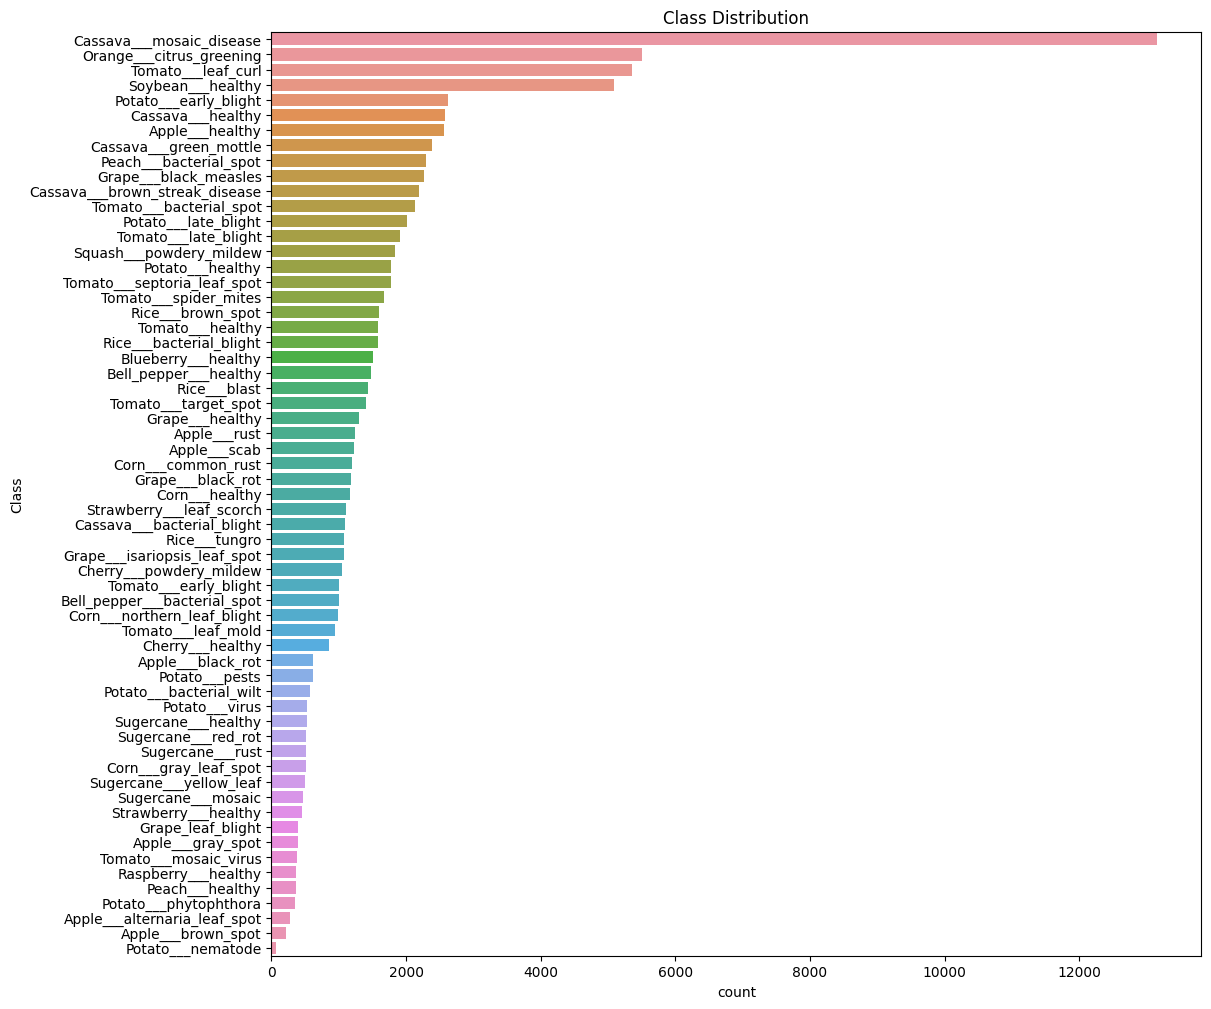

In [4]:
# Check the distribution of classes
class_counts = df['Class'].value_counts()
plt.figure(figsize=(12, 12))
sns.countplot(y='Class', data=df, order=class_counts.index)
plt.title('Class Distribution')
plt.show()

In [5]:
# Extract plant types from class names
df['plant_type'] = df['Class'].apply(lambda x: x.split('___')[0])

# Count the occurrences of each plant type
plant_type_counts = df['plant_type'].value_counts()

# Display the count of each plant type
print(plant_type_counts)

plant_type
Cassava              21397
Tomato               18160
Potato                8552
Apple                 6542
Grape                 5832
Rice                  5704
Orange                5507
Soybean               5090
Corn                  3852
Peach                 2657
Sugercane             2521
Bell_pepper           2475
Cherry                1906
Squash                1835
Strawberry            1565
Blueberry             1502
Grape_leaf_blight      400
Raspberry              371
Name: count, dtype: int64


In [6]:
problematic_rows = df[df['Class'].apply(lambda x: len(x.split('___'))< 2)]
print("Problematic Rows:")
print(problematic_rows)

Problematic Rows:
                                              Image_Path              Class   
22632  ../data/images/Grape_leaf_blight/5d261e2e-5541...  Grape_leaf_blight  \
22633  ../data/images/Grape_leaf_blight/d5a4f65f-7d27...  Grape_leaf_blight   
22634  ../data/images/Grape_leaf_blight/54a17d93-22ce...  Grape_leaf_blight   
22635  ../data/images/Grape_leaf_blight/04d59dc2-2133...  Grape_leaf_blight   
22636  ../data/images/Grape_leaf_blight/d5d5532f-7fbd...  Grape_leaf_blight   
...                                                  ...                ...   
23027  ../data/images/Grape_leaf_blight/9c6fb219-6111...  Grape_leaf_blight   
23028  ../data/images/Grape_leaf_blight/ba8778b1-8caf...  Grape_leaf_blight   
23029  ../data/images/Grape_leaf_blight/b59823b4-69a0...  Grape_leaf_blight   
23030  ../data/images/Grape_leaf_blight/2c135c30-428c...  Grape_leaf_blight   
23031  ../data/images/Grape_leaf_blight/6e4d7942-a265...  Grape_leaf_blight   

              plant_type  
22632 

In [7]:

#problematic_rows = df[df['Class'].str.contains('Grape_leaf_blight')]
df['Class'] = df['Class'].replace('Grape_leaf_blight', 'Grape___leaf_blight', regex=True)


In [8]:
# Extract disease types from class names
df['disease_type'] = df['Class'].apply(lambda x: x.split('___')[1])

# Count the occurrences of each disease type
disease_type_counts = df['disease_type'].value_counts()

# Display the count of each disease type
print(disease_type_counts)

disease_type
healthy                 21615
mosaic_disease          13158
citrus_greening          5507
bacterial_spot           5421
leaf_curl                5357
late_blight              3929
early_blight             3628
powdery_mildew           2887
bacterial_blight         2671
green_mottle             2386
black_measles            2271
brown_streak_disease     2189
brown_spot               1815
black_rot                1801
septoria_leaf_spot       1771
rust                     1755
spider_mites             1676
blast                    1440
target_spot              1404
scab                     1222
common_rust              1192
leaf_scorch              1109
tungro                   1080
isariopsis_leaf_spot     1076
northern_leaf_blight      985
leaf_mold                 952
pests                     611
bacterial_wilt            569
virus                     532
red_rot                   518
gray_leaf_spot            513
yellow_leaf               505
mosaic                    4

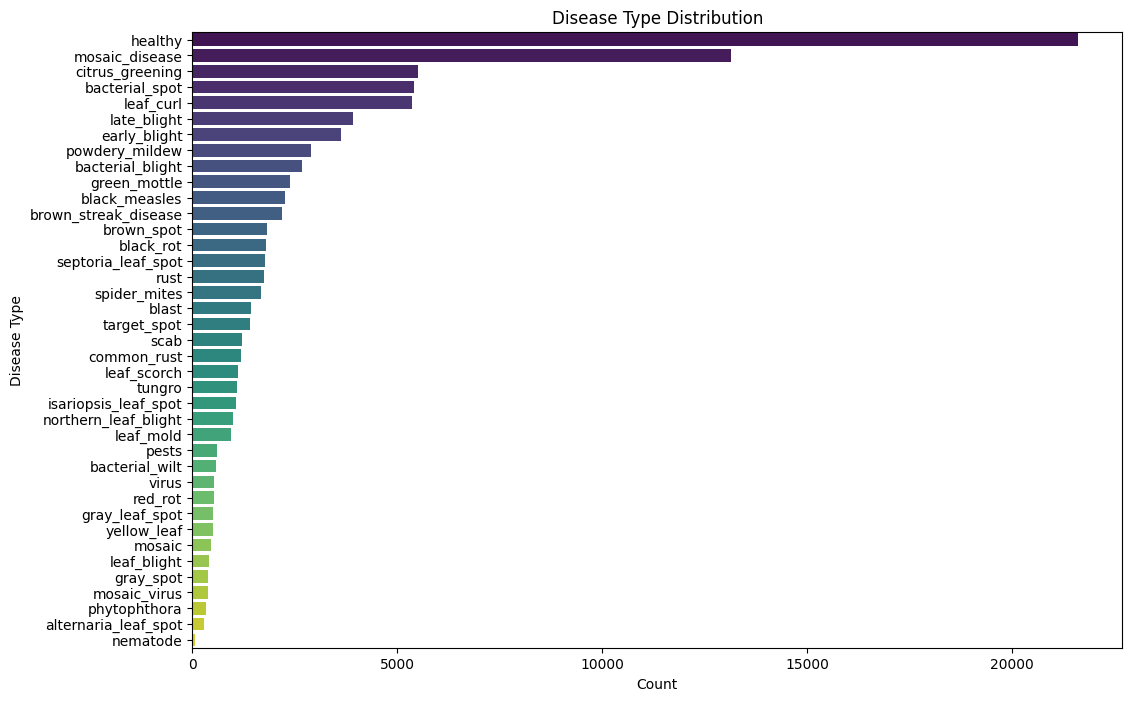

In [9]:
df['disease_type'] = df['Class'].apply(lambda x: x.split('___')[1:])

# Flatten the lists in 'disease_type'
flat_disease_types = [item for sublist in df['disease_type'] for item in sublist]

# Create a DataFrame for flattened disease types
flat_df = pd.DataFrame({'disease_type': flat_disease_types})

# Plot count plot for 'disease_type'
plt.figure(figsize=(12, 8))
sns.countplot(y='disease_type', data=flat_df, order=flat_df['disease_type'].value_counts().index, palette='viridis')
plt.title('Disease Type Distribution')
plt.xlabel('Count')
plt.ylabel('Disease Type')
plt.show()

In [10]:

# Display sample images from each class
# class_folders = os.listdir(dataset_path)
# for class_folder in class_folders:
    # class_path = os.path.join(dataset_path, class_folder)
    # sample_image = os.listdir(class_path)[0]
    # image_path = os.path.join(class_path, sample_image)
    # Display the image
    #img = Image.open(image_path)
    #plt.imshow(img)
    #plt.title(f"Class: {class_folder}")
    # plt.show()

# Check the size of the images 

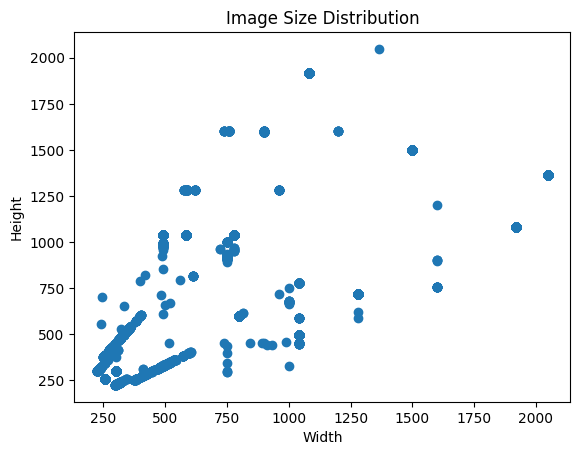

In [11]:
image_sizes = df['Image_Path'].apply(lambda x: Image.open(x).size)
width, height = zip(*image_sizes)

# Plot the image size distribution
plt.scatter(width, height)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [12]:
df['Image_Path'].apply(lambda x: Image.open(x).size).value_counts()

Image_Path
(256, 256)      60418
(800, 600)      21397
(300, 300)       4624
(1500, 1500)     2328
(2048, 1365)     1729
                ...  
(240, 553)          1
(520, 671)          1
(323, 525)          1
(913, 440)          1
(750, 909)          1
Name: count, Length: 429, dtype: int64

# Check the distribution of pixel values in the corresponding color channel.

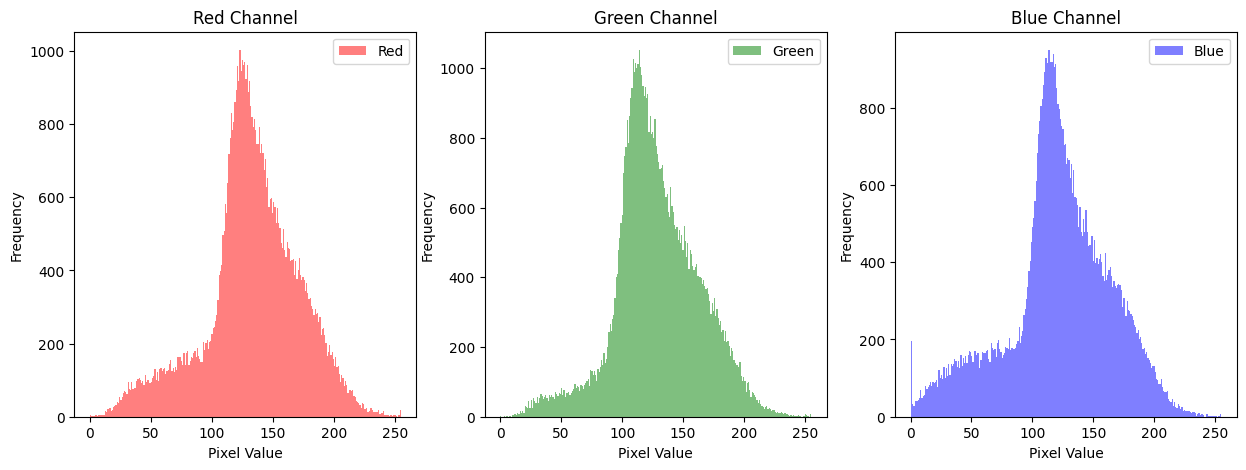

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_color_distribution(image_path):
    image = Image.open(image_path)
    colors = ['Red', 'Green', 'Blue']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots with 1 row and 3 columns
    for i, color in enumerate(colors):
        axes[i].hist(np.array(image)[:, :, i].flatten(), bins=256, color=color.lower(), alpha=0.5, label=color)
        axes[i].set_title(f'{color} Channel')
        axes[i].set_xlabel('Pixel Value')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
    plt.show()

# Plot color distribution for a sample image
plot_color_distribution(df['Image_Path'].iloc[0])


# Descriptive Statistics: 
Compute summary statistics such as mean, median, standard deviation, and quartiles for each color channel. This provides a quantitative understanding of the distribution of pixel values.

In [23]:
import numpy as np
from PIL import Image

def compute_color_statistics(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)

    # Splitting the image into Red, Green, Blue channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]

    # Compute summary statistics for each color channel
    red_stats = {
        'Mean': np.mean(red_channel),
        'Median': np.median(red_channel),
        'Standard Deviation': np.std(red_channel),
        'Q1': np.percentile(red_channel, 25),
        'Q3': np.percentile(red_channel, 75)
    }

    green_stats = {
        'Mean': np.mean(green_channel),
        'Median': np.median(green_channel),
        'Standard Deviation': np.std(green_channel),
        'Q1': np.percentile(green_channel, 25),
        'Q3': np.percentile(green_channel, 75)
    }

    blue_stats = {
        'Mean': np.mean(blue_channel),
        'Median': np.median(blue_channel),
        'Standard Deviation': np.std(blue_channel),
        'Q1': np.percentile(blue_channel, 25),
        'Q3': np.percentile(blue_channel, 75)
    }

    return red_stats, green_stats, blue_stats

image_path = os.path.join(class_path, image_file)
red_stats, green_stats, blue_stats = compute_color_statistics(image_path)
print("Red Channel Statistics:")
print(red_stats)
print("\nGreen Channel Statistics:")
print(green_stats)
print("\nBlue Channel Statistics:")
print(blue_stats)


Red Channel Statistics:
{'Mean': 120.57286071777344, 'Median': 112.0, 'Standard Deviation': 55.23641594892098, 'Q1': 72.0, 'Q3': 170.0}

Green Channel Statistics:
{'Mean': 129.40805053710938, 'Median': 132.0, 'Standard Deviation': 39.399598961456675, 'Q1': 100.0, 'Q3': 159.0}

Blue Channel Statistics:
{'Mean': 116.44070434570312, 'Median': 112.0, 'Standard Deviation': 52.92297316400099, 'Q1': 72.0, 'Q3': 161.0}


# Cumulative Distribution Function (CDF)
This graphically represents the probability that a pixel has a value less than or equal to a certain intensity. It can help in understanding the overall brightness and contrast of the image.

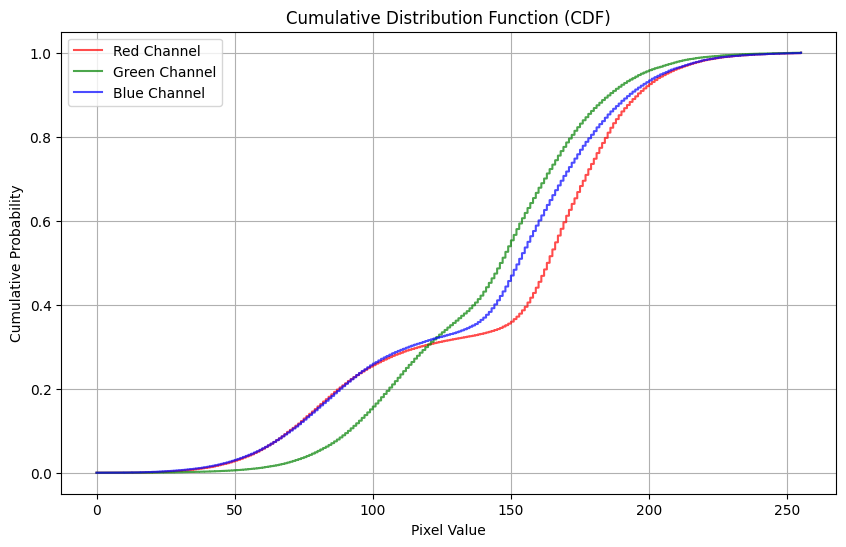

In [26]:

def compute_cdf(channel):
    sorted_values = np.sort(channel.flatten())
    cdf = np.cumsum(sorted_values)
    cdf = cdf / cdf[-1]  # Normalize the CDF to [0, 1]
    return sorted_values, cdf

def plot_cdf(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)

    # Splitting the image into Red, Green, Blue channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]

    # Compute CDF for each color channel
    red_sorted, red_cdf = compute_cdf(red_channel)
    green_sorted, green_cdf = compute_cdf(green_channel)
    blue_sorted, blue_cdf = compute_cdf(blue_channel)

    # Plot CDF for each color channel
    plt.figure(figsize=(10, 6))
    plt.plot(red_sorted, red_cdf, color='red', label='Red Channel', alpha=0.7)
    plt.plot(green_sorted, green_cdf, color='green', label='Green Channel', alpha=0.7)
    plt.plot(blue_sorted, blue_cdf, color='blue', label='Blue Channel', alpha=0.7)

    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

image_path = os.path.join(class_path, image_file)
plot_cdf(image_path)


# Examining the aspect ratio distribution, 
It shows general orientation of the images in the dataset and understand how they are distributed across different aspect ratios.

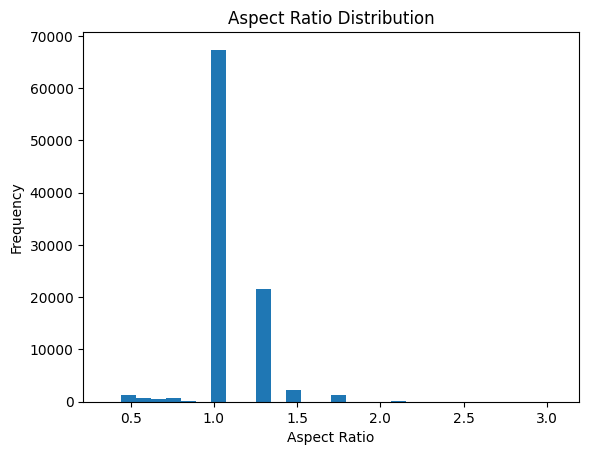

In [15]:
aspect_ratios = df['Image_Path'].apply(lambda x: Image.open(x).size[0] / Image.open(x).size[1])
plt.hist(aspect_ratios, bins=30)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


# Preprocessing:

```python from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Specify the target size for resizing
target_size = (224, 224)

# Load and preprocess images
def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)
    # Normalize pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    return image

# Apply preprocessing to the entire dataset
df['Processed_Image'] = df['Image_Path'].apply(lambda x: load_and_preprocess_image(x, target_size))

# Convert class labels to numerical format
class_to_index = {cls: idx for idx, cls in enumerate(df['Class'].unique())}
df['Class_Index'] = df['Class'].map(class_to_index)
df['Class_OneHot'] = to_categorical(df['Class_Index'], num_classes=len(class_to_index))

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=42)

# ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of data augmentation
sample_image_path = train_df['Image_Path'].iloc[0]
sample_image = load_and_preprocess_image(sample_image_path, target_size)
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Display original and augmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')
plt.axis('off')

for i, augmented_image in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i >= 3:  # Display three augmented versions
        break
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_image[0])
    plt.title(f'Augmented #{i + 1}')
    plt.axis('off')

plt.show()


# Pre trained model for plant disease prdiction

There are several pretrained model available for plant disease classification. Some popular are 

# 1. ResNet
* ResNet (Residual Neural Network) is a deep convolutional neural network architecture.
Introduced by Microsoft Research in 2015.
* By stacking residual blocks, ResNet can achieve very deep architectures (e.g., ResNet-50, ResNet-101, ResNet-152).
* ResNet architectures have been highly successful in various computer vision tasks, including image classification, object detection, and segmentation.
* design an ultra-deep network free of the vanishing gradient issue
* Overfitting Risk: Deeper networks may be prone to overfitting, especially when trained on small datasets. Regularization techniques like dropout and weight decay are often needed.

# 2. EfficientNet
* EfficientNet is another popular (more recent) CNN-based ImageNet model.
* EfficientNet performs model scaling in an innovative way to achieve excellent accuracy with significantly fewer parameters. 
* It achieves the same if not greater accuracy than ResNet and DenseNet with a mcuh shallower architecture. 

# 3. DenseNet
* Densely Connected Convolutional Networks (DenseNets), are a popular CNN-based ImageNet used for a variety of applications, inclusing classification, segmentation, localization, etc. 
* The densely connected architecture mitigates the vanishing-gradient problem by providing shorter paths for gradients to propagate during backpropagation, which can lead to faster convergence during training.
* Fine-tuning DenseNet models for specific tasks may require careful adjustment of hyperparameters and regularization techniques to prevent overfitting and ensure optimal performance, which can be more challenging due to the architecture's complexity.


# 4. InceptionV3
* InceptionV3 is known for its computational efficiency and high accuracy. 
* It utilizes inception modules that allow for the use of different kernel sizes in parallel.

# 5. Xception:  
* Xception is an extension of the Inception architecture, where depth-wise separable convolutions are used instead of standard convolutions.
* It aims to capture more spatial and channel-wise dependencies.

# 6. VGG16/VGG19: 
* These models have shown good performance in various image classification tasks. 
* They have a simple and uniform architecture, making them easy to understand and implement.
